# FXCM

## Course Structure    

1.	Fundamentals of Algo Trading
    1. The general types of algo strategies that people use (range, trending, breakout, etc)
    2. Risk management fundamentals

2.	Finding data and connecting to a broker
    1.	Setting up a Demo Account
    2.	Server Connection
    3.	Historical Data
        1. Obtaining Historical Data
        2. Understanding Data Frequency
        3. Working with Window Period
        
    4.	Streaming Data
    5.	Account and Positions
        1.	Obtaining Account Information
        2.	Obtaining Open and Closed Positions
        3.	Obtaining Open Orders
        4.	Obtaining Summary Information of Account 
    6.	Extract Table of Market Prices
    7.	Market Orders
        1.	Placing Orders
        2.	General Market Orders
        3.	Modify Market Order
    8.	Close Positions
        1.	Close Position by ID
        2.	Close Position by Symbol
        3.	Close All Positions
        4.	View All Closed Positions
    9.	Entry Order
        1.	Placing Entry Order
        2.	Existing Order
        3.	Changing Orders
        4.	Deleting Orders
    10.	Understanding the fxcm_order Class

3. Building a strategy


***

# Setting Up Your FXCM Demo Account

REST API Credentials and Resources (Demo Environment):

This credential will only last for 60 days

https://tradingstation.fxcm.com/

* Username:  D261079239
* Password:  6541
* REST API Token:  d656c222425d23a10948cca38d5c104a42197a5a
* Resources:
    * [Github](https://github.com/FXCMAPI/FXCM-API-Offerings)
    * [Swagger.io documentation](https://fxcmapi.github.io/rest-api-docs/#)
    * [Word documentation](https://apiwiki.fxcorporate.com/api/RestAPI/Socket%20REST%20API%20Specs.docx)


## Installation

[doc](http://fxcmpy.tpq.io/00_quick_start.html)

In [1]:
!pip install fxcmpy

    100% |████████████████████████████████| 204kB 2.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for fxcmpy ... done
  Stored in directory: /Users/anthonyn/Library/Caches/pip/wheels/c4/0a/17/0d2f9a0a10aab8c4192451378512fbe7f18dc7d798ca0e3d1e
  Running setup.py bdist_wheel for socketIO-client ... done
  Stored in directory: /Users/anthonyn/Library/Caches/pip/wheels/bd/5d/9f/ebc0c223ec59641877c817eb10442627e69af88c126f1f53a8
  Running setup.py bdist_wheel for configparser ... done
  Stored in directory: /Users/anthonyn/Library/Caches/pip/wheels/a3/61/79/424ef897a2f3b14684a7de5d89e8600b460b89663e6ce9d17c
Successfully built fxcmpy socketIO-client configparser
coremltools 0.8 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.2 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


# Server Connection

[doc](http://fxcmpy.tpq.io/01_connecting.html)

In [9]:
import fxcmpy

In [10]:
fxcmpy.__version__

'1.1.18'

In [11]:
# Demo Account from FXCM 
TOKEN = "d656c222425d23a10948cca38d5c104a42197a5a"

In [12]:
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')

In [13]:
print(con.get_instruments())

['EUR/USD', 'XAU/USD', 'GBP/USD', 'UK100', 'USDOLLAR', 'XAG/USD', 'GER30', 'FRA40', 'USD/CNH', 'EUR/JPY', 'USD/JPY', 'CHN50', 'GBP/JPY', 'AUD/JPY', 'CHF/JPY', 'USD/CHF', 'GBP/CHF', 'AUD/USD', 'EUR/AUD', 'EUR/CHF', 'EUR/CAD', 'EUR/GBP', 'AUD/CAD', 'NZD/USD', 'USD/CAD', 'CAD/JPY', 'GBP/AUD', 'NZD/JPY', 'US30', 'GBP/CAD', 'SOYF', 'GBP/NZD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'AUS200', 'ESP35', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'Copper', 'EUSTX50', 'USOil', 'UKOil', 'NGAS', 'Bund']


In [14]:
len(con.get_instruments())

61

In [15]:
con.is_connected()

True

In [ ]:
con.close()

# Historical Data

[doc](http://fxcmpy.tpq.io/02_historical_data.html)

## Fetching Historical Data

In [16]:
data = con.get_candles('EUR/USD', period='m1', number=1440)

In [17]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-06-19 12:56:00,1.15578,1.15547,1.15578,1.15543,1.15593,1.15560,1.15593,1.15556,285
2018-06-19 12:57:00,1.15548,1.15537,1.15552,1.15535,1.15561,1.15549,1.15565,1.15547,190
2018-06-19 12:58:00,1.15536,1.15509,1.15537,1.15499,1.15549,1.15520,1.15549,1.15510,304
2018-06-19 12:59:00,1.15509,1.15536,1.15541,1.15509,1.15520,1.15549,1.15553,1.15520,260
2018-06-19 13:00:00,1.15537,1.15573,1.15592,1.15518,1.15550,1.15586,1.15605,1.15531,668


In [18]:
data.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-06-20 12:54:00,1.15906,1.15923,1.15950,1.15889,1.15918,1.15936,1.15963,1.15902,806
2018-06-20 12:55:00,1.15923,1.15946,1.15963,1.15902,1.15936,1.15957,1.15974,1.15915,837
2018-06-20 12:56:00,1.15946,1.15927,1.15963,1.15923,1.15957,1.15942,1.15974,1.15935,552
2018-06-20 12:57:00,1.15927,1.15917,1.15937,1.15916,1.15942,1.15929,1.15952,1.15927,416
2018-06-20 12:58:00,1.15917,1.15938,1.15940,1.15913,1.15929,1.15950,1.15952,1.15923,245


In [19]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

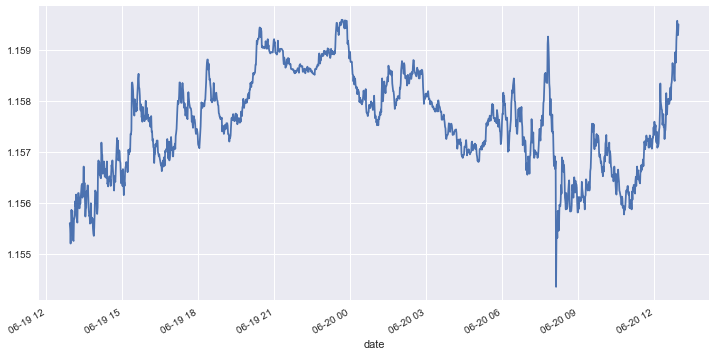

In [20]:
data['askclose'].plot(figsize=(12, 6));

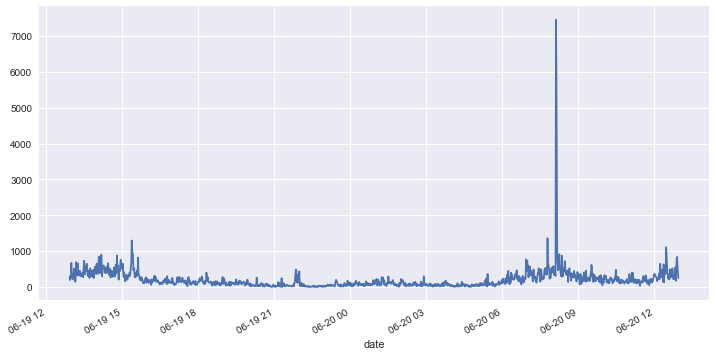

In [21]:
data['tickqty'].plot(figsize=(12, 6));

## Data Frequency

[doc](http://fxcmpy.tpq.io/02_historical_data.html#Data-Frequency)

Available frequencie:

* minutes: `m1`, `m5`, `m15` and `m30`,
* hours: `H1`, `H2`, `H3`, `H4`, `H6` and `H8`,
* one day: `D1`,
* one week: `W1`,
* one month: `M1`.

In [22]:
con.get_candles('AUD/USD', period='M1')  # monthly data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-07-31 21:00:00,0.80011,0.79452,0.80419,0.78069,0.80031,0.79483,0.80449,0.78086,3592413
2017-08-31 21:00:00,0.79452,0.78273,0.81242,0.77987,0.79483,0.78351,0.81261,0.78003,3715114
2017-09-30 21:00:00,0.78273,0.76551,0.78967,0.76240,0.78351,0.76578,0.78984,0.76259,3079123
2017-10-31 21:00:00,0.76551,0.75630,0.77290,0.75312,0.76578,0.75695,0.77307,0.75329,2622280
2017-11-30 22:00:00,0.75630,0.78005,0.78242,0.75004,0.75695,0.78099,0.78258,0.75023,2060595
2017-12-31 22:00:00,0.78005,0.80533,0.81350,0.77936,0.78099,0.80576,0.81367,0.77956,3512153
2018-01-31 22:00:00,0.80533,0.77601,0.80665,0.77581,0.80576,0.77629,0.80683,0.77599,4323428
2018-04-01 20:00:00,0.76937,0.76892,0.76965,0.76870,0.76988,0.76955,0.77006,0.76922,89
2018-05-01 20:00:00,0.75731,0.74887,0.75812,0.74718,0.75807,0.74926,0.75829,0.74733,287291


In [23]:
con.get_candles('AUD/USD', period='m1', number=5)  # five one-minute bars

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-06-20 12:56:00,0.73937,0.73925,0.73942,0.73917,0.73954,0.73943,0.73956,0.73934,256
2018-06-20 12:57:00,0.73925,0.73906,0.73928,0.73905,0.73943,0.73923,0.73943,0.73922,228
2018-06-20 12:58:00,0.73906,0.73908,0.73913,0.73892,0.73923,0.73924,0.73929,0.73907,296
2018-06-20 12:59:00,0.73908,0.73893,0.73912,0.73893,0.73924,0.73911,0.73929,0.73909,157
2018-06-20 13:00:00,0.73892,0.73884,0.73896,0.73884,0.73910,0.73901,0.73913,0.73901,108


## Historical Window Period

[doc](http://fxcmpy.tpq.io/02_historical_data.html#Time-Windows)

In [24]:
import pandas as pd
import datetime as dt

In [25]:
start = dt.datetime(2018, 1, 15)
stop = dt.datetime(2018, 2, 1)
con.get_candles('AUD/USD', 
                period='D1',
                start=start, 
                stop=stop)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-01-16 22:00:00,0.79625,0.79579,0.79740,0.79359,0.79682,0.79644,0.79758,0.79377,141898
2018-01-17 22:00:00,0.79579,0.79678,0.80220,0.79396,0.79644,0.79719,0.80238,0.79412,193494
2018-01-18 22:00:00,0.79678,0.79972,0.80062,0.79409,0.79719,0.80044,0.80081,0.79425,171189
2018-01-19 22:00:00,0.79972,0.79830,0.80379,0.79812,0.80044,0.79903,0.80395,0.79861,161478
2018-01-21 22:00:00,0.79830,0.79974,0.80008,0.79884,0.79903,0.80048,0.80048,0.79951,262
2018-01-22 22:00:00,0.79974,0.80143,0.80263,0.79781,0.80048,0.80196,0.80279,0.79796,109930
2018-01-23 22:00:00,0.80143,0.79966,0.80288,0.79556,0.80196,0.80031,0.80307,0.79573,153215
2018-01-24 22:00:00,0.79966,0.80610,0.80821,0.79924,0.80031,0.80636,0.80838,0.79942,181201
2018-01-25 22:00:00,0.80610,0.80223,0.81180,0.80106,0.80636,0.80288,0.81196,0.80124,317428


***

# Streaming Data

Start with subscribing the instrument you would like to stream

[doc](http://fxcmpy.tpq.io/03_streaming_market_data.html#Basic-Approach)

In [26]:
con.subscribe_market_data('USD/JPY')

In [27]:
con.get_subscribed_symbols()

['USD/JPY']

Once subscribed, the data is collected in pandas DataFrame format. To obtain the price data, use `con.get_prices()` method

In [28]:
con.get_prices('USD/JPY')

,Bid,Ask,High,Low
2018-06-20 13:08:33.444,110.057,110.069,110.257,109.848
2018-06-20 13:08:34.152,110.055,110.067,110.257,109.848
2018-06-20 13:08:35.423,110.057,110.069,110.257,109.848
2018-06-20 13:08:36.296,110.055,110.068,110.257,109.848
2018-06-20 13:08:37.307,110.056,110.069,110.257,109.848
2018-06-20 13:08:37.763,110.058,110.070,110.257,109.848
2018-06-20 13:08:38.198,110.057,110.069,110.257,109.848
2018-06-20 13:08:38.793,110.056,110.069,110.257,109.848
2018-06-20 13:08:38.886,110.055,110.067,110.257,109.848
2018-06-20 13:08:40.282,110.055,110.068,110.257,109.848


To get the latest bid/ask

In [32]:
con.get_last_price('USD/JPY')

Bid     110.052
Ask     110.065
High    110.257
Low     109.848
Name: 2018-06-20 13:09:17.102000, dtype: float64

To stop

In [33]:
con.unsubscribe_market_data('USD/JPY')

***

# Account and Positions

[doc](http://fxcmpy.tpq.io/02_historical_data.html#Time-Windows)

## Account Information

In [62]:
con.get_accounts().T

,0
accountId,1074851
accountName,01074851
balance,5002.76
dayPL,1.49925
equity,5001.5
grossPL,-1.26075
hedging,Y
mc,N
mcDate,
ratePrecision,0


## Open Positions

[doc](http://fxcmpy.tpq.io/04_data_tables.html#Open-Positions)

In [63]:
con.get_open_positions(kind='list')

[{'accountId': '1074851',
  'accountName': '01074851',
  'amountK': 1,
  'close': 0.73791,
  'com': 0,
  'currency': 'AUD/USD',
  'currencyPoint': 0.08637,
  'grossPL': -0.47505,
  'isBuy': False,
  'isDisabled': False,
  'limit': 0,
  'open': 0.73736,
  'ratePrecision': 5,
  'roll': 0,
  'stop': 0,
  'stopMove': 0,
  't': 1,
  'time': '06202018133800',
  'tradeId': '129200800',
  'usedMargin': 4,
  'valueDate': '',
  'visiblePL': -5.5},
 {'accountId': '1074851',
  'accountName': '01074851',
  'amountK': 2,
  'close': 1.31853,
  'com': 0,
  'currency': 'GBP/USD',
  'currencyPoint': 0.17275,
  'grossPL': -0.74281,
  'isBuy': True,
  'isDisabled': False,
  'limit': 0,
  'open': 1.31896,
  'ratePrecision': 5,
  'roll': 0,
  'stop': 0,
  'stopMove': 0,
  't': 1,
  'time': '06202018133802',
  'tradeId': '129200801',
  'usedMargin': 13,
  'valueDate': '',
  'visiblePL': -4.3}]

In [65]:
con.get_open_positions(kind='dataframe').T

,0,1
accountId,1074851,1074851
accountName,01074851,01074851
amountK,1,2
close,0.73802,1.31852
com,0,0
currency,AUD/USD,GBP/USD
currencyPoint,0.08637,0.17274
grossPL,-0.57005,-0.76007
isBuy,False,True
isDisabled,False,False


## Close Positions

[doc](http://fxcmpy.tpq.io/04_data_tables.html#Closed-Positions)

In [66]:
con.get_closed_positions(kind='dataframe').T

,0,1
accountName,01074851,01074851
amountK,5,5
close,1.15832,1.1585
closeTime,06202018134639,06202018134932
com,0,0
currency,EUR/USD,EUR/USD
currencyPoint,0.43189,0.43189
grossPL,0.99,1.77
isBuy,True,True
open,1.15809,1.15809


## Open Orders

[doc](http://fxcmpy.tpq.io/04_data_tables.html#Open-Orders)

In [67]:
con.get_orders().T

""


## Summary of Information

In [68]:
con.get_open_positions_summary().T

,0
accountId,
accountName,
amountK,3
close,0
com,0
currency,
currencyPoint,0
grossPL,-1.90881
isBuy,False
isDisabled,False


In [69]:
con.get_closed_positions_summary().T

,0
accountName,
amountK,10
close,0
closeTime,None
com,0
currency,EUR/USD
currencyPoint,0
grossPL,2.76
isBuy,False
isTotal,True


In [70]:
con.get_accounts_summary().T

,0
accountId,
accountName,
balance,5002.76
dayPL,1.15377
equity,5001.15
grossPL,-1.60623
hedging,
isTotal,True
mc,
mcDate,None


In [71]:
con.get_summary().T

,0,1
amountK,-1,2
amountKBuy,0,2
amountKSell,1,0
avgBuy,0,1.31896
avgSell,0.73736,0
closeBuy,0.73818,0
closeSell,0,1.31841
currency,AUD/USD,GBP/USD
currencyPoint,-0.08635,0.17271
grossPL,-0.70811,-0.9499


***

# Table of Market Prices

[doc](http://fxcmpy.tpq.io/04_data_tables.html#Offers)

In [43]:
res = con.get_offers(kind='dataframe')
res

,buy,buyTradable,currency,defaultSortOrder,emr,fractionDigits,high,instrumentType,lmr,low,...,ratePrecision,rollB,rollS,sell,sellTradable,spread,t,time,valueDate,volume
0,1.15833,True,EUR/USD,100,0,5,1.16006,1,0,1.15356,...,5,-2.78220,1.31970,1.15818,True,1.5,0,+050437-12-21T08:13:10.000Z,06222018,1.00000
1,1274.61000,True,XAU/USD,150,0,2,1276.69000,5,0,1270.53000,...,2,-0.14512,0.00000,1274.23000,True,38.0,0,+050437-12-21T08:13:18.000Z,06222018,0.86242
2,1.31886,True,GBP/USD,250,0,5,1.31996,1,0,1.31455,...,5,-2.03790,0.93330,1.31873,True,1.3,0,+050437-12-21T08:13:21.000Z,06222018,0.86255
3,7676.50000,True,UK100,350,0,2,7706.30000,2,0,7631.95000,...,2,-0.08633,-0.03453,7675.50000,True,1.0,0,+050437-12-21T08:08:16.000Z,06222018,1.13782
4,12073.00000,True,USDOLLAR,450,0,0,12086.00000,7,0,12062.00000,...,0,-0.16421,-1.18408,12071.00000,True,2.0,0,+050437-12-21T07:58:25.000Z,,0.86272
5,16.32600,True,XAG/USD,550,0,3,16.39400,5,0,16.23500,...,3,-0.02568,-0.00514,16.28300,True,4.3,0,+050437-12-21T08:12:00.000Z,06222018,0.86242
6,12708.00000,True,GER30,650,0,2,12762.39000,2,0,12676.37000,...,2,-0.09497,-0.08633,12706.97000,True,1.0,0,+050437-12-21T08:06:36.000Z,06222018,1.00000
7,5393.32000,True,FRA40,750,0,2,5431.42000,2,0,5389.52000,...,2,-0.04317,-0.03453,5391.52000,True,1.8,0,+050437-12-21T08:09:49.000Z,06222018,1.00000
8,6.47866,True,USD/CNH,799,0,5,6.48733,1,0,6.46602,...,5,-1.93950,0.23070,6.47808,True,5.8,0,+050437-12-21T08:09:54.000Z,,0.86242
9,127.48600,True,EUR/JPY,850,0,3,127.75400,1,0,127.08100,...,3,-0.30330,0.11160,127.46700,True,1.9,0,+050437-12-21T08:13:02.000Z,06222018,1.00000


In [44]:
res.columns

Index(['buy', 'buyTradable', 'currency', 'defaultSortOrder', 'emr',
       'fractionDigits', 'high', 'instrumentType', 'lmr', 'low', 'mmr',
       'offerId', 'pip', 'pipCost', 'pipFraction', 'ratePrecision', 'rollB',
       'rollS', 'sell', 'sellTradable', 'spread', 't', 'time', 'valueDate',
       'volume'],
      dtype='object')

In [45]:
res.currency

0      EUR/USD
1      XAU/USD
2      GBP/USD
3        UK100
4     USDOLLAR
5      XAG/USD
6        GER30
7        FRA40
8      USD/CNH
9      EUR/JPY
10     USD/JPY
11     GBP/JPY
12     AUD/JPY
13     USD/CHF
14     AUD/USD
15     EUR/CHF
16     EUR/GBP
17     NZD/USD
18     USD/CAD
19        US30
Name: currency, dtype: object

In [47]:
res.iloc[0]

buy                                     1.15833
buyTradable                                True
currency                                EUR/USD
defaultSortOrder                            100
emr                                           0
fractionDigits                                5
high                                    1.16006
instrumentType                                1
lmr                                           0
low                                     1.15356
mmr                                        0.01
offerId                                       1
pip                                      0.0001
pipCost                                   9e-05
pipFraction                                 0.1
ratePrecision                                 5
rollB                                   -2.7822
rollS                                    1.3197
sell                                    1.15818
sellTradable                               True
spread                                  

***

# Market Orders

## Placing Orders



[open trade](https://fxcm.github.io/rest-api-docs/#operation/openTrade)

[place orders](http://fxcmpy.tpq.io/05_market_orders.html#Placing-Orders)

Check on any existing open position

In [48]:
con.get_open_positions().T

""


Let's place two concurrent orders - a buy and a sell order.

In [96]:
order = con.create_market_sell_order('AUD/USD', 1)
order = con.create_market_buy_order('GBP/USD', 2)

In [50]:
con.get_open_positions()

,accountId,accountName,amountK,close,com,currency,currencyPoint,grossPL,isBuy,isDisabled,...,ratePrecision,roll,stop,stopMove,t,time,tradeId,usedMargin,valueDate,visiblePL
0,1074851,01074851,1,0.73762,0,AUD/USD,0.08634,-0.22449,False,False,...,5,0,0,0,1,06202018133800,129200800,4,,-2.6
1,1074851,01074851,2,1.31883,0,GBP/USD,0.17268,-0.22449,True,False,...,5,0,0,0,1,06202018133802,129200801,13,,-1.3


In [51]:
con.get_open_positions().T

,0,1
accountId,1074851,1074851
accountName,01074851,01074851
amountK,1,2
close,0.73751,1.31883
com,0,0
currency,AUD/USD,GBP/USD
currencyPoint,0.08635,0.1727
grossPL,-0.12952,-0.2245
isBuy,False,True
isDisabled,False,False


## General Market Orders

[open trade](https://fxcm.github.io/rest-api-docs/#operation/openTrade)

[general market orders](http://fxcmpy.tpq.io/05_market_orders.html#General-Market-Orders)

Required parameters:- 

* **"account_id"** (Required): This is not required for trading with fxcmpy
* **"symbol"** (Required): Instrument symbol. E.g., "EUR/USD"
* "is_buy": Defines the trade‘s market side (if true, then buy trade,otherwise sell trade)
* "rate": Exchange rate to trade at
* "is_in_pips": Defines if the trade's stop/limit rate is in pips.
* **"amount"** (Required): Trade amount in lots
* **"at_market"** (Required): Defines the market range
* **"order_type"** (Required): The type of the order execution. Market Order type choices "AtMarket", "MarketRange".
* **"time_in_force"** (Required): Time in force choices "IOC", "GTC", "FOK", "DAY", "GTD".

**Note:** In bold: Required parameters


In [55]:
order = con.open_trade(symbol='EUR/USD', 
                       is_buy=True,
                       rate=1.1560, 
                       is_in_pips=False,
                       amount='5', 
                       time_in_force='GTC',
                       order_type='AtMarket', 
                       limit=1.1585)

In [56]:
con.get_open_positions().T

,0,1,2,3
accountId,1074851,1074851,1074851,1074851
accountName,01074851,01074851,01074851,01074851
amountK,1,2,5,5
close,0.7376,1.3188,1.15796,1.15796
com,0,0,0,0
currency,AUD/USD,GBP/USD,EUR/USD,EUR/USD
currencyPoint,0.08635,0.17271,0.43177,0.43177
grossPL,-0.20725,-0.27633,-0.56133,-0.56133
isBuy,False,True,True,True
isDisabled,False,False,False,False


## Modify Market Order (Stop or Trade Limit)

[change trade stop limit](https://fxcm.github.io/rest-api-docs/#operation/changeTradeStopLimit)

[editing market orders](http://fxcmpy.tpq.io/05_market_orders.html#Editing-Market-Orders)

In [57]:
tradeId = con.get_open_trade_ids()[-1]
tradeId

129200903

In [60]:
con.change_trade_stop_limit(tradeId, 
                            is_in_pips=False,
                            is_stop=False, 
                            rate=1.1583)

In [61]:
con.get_open_positions().T

,0,1,2,3
accountId,1074851,1074851,1074851,1074851
accountName,01074851,01074851,01074851,01074851
amountK,1,2,5,5
close,0.73776,1.31879,1.15817,1.15817
com,0,0,0,0
currency,AUD/USD,GBP/USD,EUR/USD,EUR/USD
currencyPoint,0.08634,0.17268,0.43169,0.43169
grossPL,-0.34535,-0.29355,0.34537,0.34537
isBuy,False,True,True,True
isDisabled,False,False,False,False


# Close Positions

### Close Position by `tradeId`

[close trade](https://fxcm.github.io/rest-api-docs/#operation/closeTrade)

[closing positions](http://fxcmpy.tpq.io/05_market_orders.html#Closing-Positions)

In [76]:
data = con.get_open_positions(kind='dataframe').T

In [77]:
data

,0,1
accountId,1074851,1074851
accountName,01074851,01074851
amountK,1,2
close,0.73842,1.31962
com,0,0
currency,AUD/USD,GBP/USD
currencyPoint,0.08633,0.17266
grossPL,-0.91511,1.13958
isBuy,False,True
isDisabled,False,False


In [87]:
tradeId = data[data.index == 'tradeId'].values[0][0]

In [90]:
con.close_trade(trade_id=tradeId, amount=1)

In [91]:
con.get_open_positions().T

,0
accountId,1074851
accountName,01074851
amountK,2
close,1.31882
com,0
currency,GBP/USD
currencyPoint,0.17271
grossPL,-0.2418
isBuy,True
isDisabled,False


### Close Position by Instrument Symbol

[close all for symbol](https://fxcm.github.io/rest-api-docs/#operation/close_all_for_symbol)

[closing positions](http://fxcmpy.tpq.io/05_market_orders.html#Closing-Positions)

In [94]:
con.close_all_for_symbol('GBP/USD')

In [97]:
con.get_open_positions().T

,0,1
accountId,1074851,1074851
accountName,01074851,01074851
amountK,1,2
close,0.73816,1.3187
com,0,0
currency,AUD/USD,GBP/USD
currencyPoint,0.08636,0.17272
grossPL,-0.15545,-0.05182
isBuy,False,True
isDisabled,False,False


### Close All Positions

[closing positions](http://fxcmpy.tpq.io/05_market_orders.html#Closing-Positions)

In [98]:
con.close_all()
con.get_open_positions()

""


### To View All Closed Positions

In [99]:
con.get_closed_positions().T

,0,1,2,3,4,5
accountName,01074851,01074851,01074851,01074851,01074851,01074851
amountK,5,5,1,2,1,2
close,1.15832,1.1585,0.73822,1.31858,0.73818,1.31883
closeTime,06202018134639,06202018134932,06202018140203,06202018140242,06202018140318,06202018140318
com,0,0,0,0,0,0
currency,EUR/USD,EUR/USD,AUD/USD,GBP/USD,AUD/USD,GBP/USD
currencyPoint,0.43177,0.43177,0.08635,0.17271,0.08635,0.17271
grossPL,0.99,1.77,-0.74,-0.66,-0.17,0.17
isBuy,True,True,False,True,False,True
open,1.15809,1.15809,0.73736,1.31896,0.73798,1.31873


***

# Entry Order

[entry orders](http://fxcmpy.tpq.io/06_entry_orders.html)

## Placing Entry Order

[placing entry orders](http://fxcmpy.tpq.io/06_entry_orders.html#Placing-Entry-Orders)

In [140]:
order = con.create_entry_order(symbol='USD/JPY', 
                               is_buy=True,
                               amount=6, 
                               limit=110.50,   # if we are long, we will buy from 110 and up to 110.50
                               is_in_pips = False,
                               time_in_force='GTC', 
                               rate=110,    # limit price to trade
                               stop=None, 
                               trailing_step=None)

In [139]:
order = con.create_entry_order(symbol='EUR/JPY', 
                               is_buy=False,
                               amount=10, 
                               limit=127.00,   # if we are long, we will buy from 110 and up to 110.50
                               is_in_pips = False,
                               time_in_force='GTC', 
                               rate=128.00,    # limit price to trade
                               stop=None, 
                               trailing_step=None)

In [103]:
con.create_entry_order?

## Existing Orders

[existing orders](http://fxcmpy.tpq.io/06_entry_orders.html#Existing-Orders)

In [141]:
con.get_orders().T  # returns DataFrame by default

,0,1,2
accountId,1074851,1074851,1074851
accountName,01074851,01074851,01074851
amountK,6,10,6
buy,110,0,110
currency,USD/JPY,EUR/JPY,USD/JPY
currencyPoint,0.47076,0.78459,0.47076
expireDate,,,
isBuy,True,False,True
isELSOrder,False,False,False
isEntryOrder,True,True,True


## Changing Orders

[Changing Orders](http://fxcmpy.tpq.io/06_entry_orders.html#Changing-Orders)

In [142]:
con.get_order_ids()

[251755699, 251755705, 251755691]

In [115]:
order_id = con.get_order_ids()
order_id.sort()
order_id[-1]

251754490

In [116]:
con.change_order_stop_limit(order_id=order_id[-1], 
                            is_stop_in_pips=True,
                            is_limit_in_pips=True, 
                            limit=111, 
                            stop=-1)

In [118]:
con.change_order(order_id=order_id[-1], 
                 amount=10, 
                 rate=104)    # rate = trade rate. for buy order, it is the buy.

In [119]:
con.get_orders().T

,0,1,2
accountId,1074851,1074851,1074851
accountName,01074851,01074851,01074851
amountK,6,6,10
buy,106,110,104
currency,USD/JPY,USD/JPY,USD/JPY
currencyPoint,0.47061,0.47061,0.78436
expireDate,,,
isBuy,True,True,True
isELSOrder,False,False,False
isEntryOrder,True,True,True


## Deleting Orders

[Deleting Orders](http://fxcmpy.tpq.io/06_entry_orders.html#Deleting-Orders)

In [122]:
con.get_order_ids()

[251754232, 251754490, 251755051, 251754455]

In [126]:
for order in order_id:
    con.delete_order(order)

In [129]:
con.get_orders().T

""


In [128]:
con.delete_order(251755051)

In [132]:
con.old_orders

{251752343: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x1141f22b0>,
 251752344: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x1141f2da0>,
 251752725: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x1142013c8>,
 251752760: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x1142362b0>,
 251752871: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114236780>,
 251753009: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114236668>,
 251753798: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114267198>,
 251753824: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114267fd0>,
 251753833: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x11426c7b8>,
 251753835: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114267128>,
 251753842: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x11426ca58>,
 251753843: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x11426cef0>,
 251754232: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114280908>,
 251754455: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114297668>,
 251754490: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x1142807f0>,
 251755051: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x1142

In [134]:
con.get_order_ids()
#con.delete_order(order_id)

[]

In [135]:
con.get_orders().T

""


***

# The fxcm_order Class

[The fxcm_order Class](http://fxcmpy.tpq.io/07_fxcm_order.html)

## Order Ids

Use `get_order_ids` to obtain the `ids` of existing orders

In [143]:
order_ids = con.get_order_ids()
print(order_ids)

[251755699, 251755705, 251755691]


In [144]:
con.orders

{251755691: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114248e48>,
 251755699: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x11412b978>,
 251755705: <fxcmpy.fxcmpy_order.fxcmpy_order at 0x114251d30>}

## Order Objects



Get an existing order object. `con.get_order()`

In [146]:
order = con.get_order(order_ids[-1])
print(order)

accountId:        1074851
accountName:      01074851
amountK:          6
buy:              110
currency:         USD/JPY
currencyPoint:    0.47075
isBuy:            True
isELSOrder:       False
isEntryOrder:     True
isLimitOrder:     True
isNetQuantity:    False
isStopOrder:      False
limit:            110.5
limitPegBaseType: -1
limitRate:        110.5
ocoBulkId:        0
orderId:          251755691
range:            0
sell:             0
status:           Waiting
stop:             0
stopMove:         0
stopPegBaseType:  -1
stopRate:         0
time:             2018-06-20 14:27:59.921000
timeInForce:      GTC
type:             LE



## Obtaining and Amending order attributes

Use `get` to obtain attributes

In [147]:
# let's place an order so we can make ammendments
order = con.create_entry_order(symbol='AUD/JPY', is_buy=True,
                               amount=6, limit=109,
                               is_in_pips = False,
                               time_in_force='GTC', rate=106,
                               stop=None, trailing_step=None)

In [148]:
order.get_amount()

6

In [149]:
order.get_isBuy()

True

In [150]:
order.get_isStopOrder()

True

In [151]:
order.get_sell()

0

Use `set` to amend attributes

* amount: `set_amount()`
* limit: `set_limit_rate()`
* range: `set_range()`
* rate: `set_rate()`
* stop: `set_stop_rate()`
* trailing_step: `set_trailing_step()`

In [152]:
order.set_amount(10)

In [156]:
con.get_order_ids()

[251755873, 251755699, 251755705, 251755691]

In [155]:
con.get_orders().T

,0,1,2,3
accountId,1074851,1074851,1074851,1074851
accountName,01074851,01074851,01074851,01074851
amountK,6,10,6,10
buy,110,0,110,106
currency,USD/JPY,EUR/JPY,USD/JPY,AUD/JPY
currencyPoint,0.4705,0.78417,0.4705,0.78417
expireDate,,,,
isBuy,True,False,True,True
isELSOrder,False,False,False,False
isEntryOrder,True,True,True,True


In [157]:
order_ids = con.get_order_ids()
order = con.get_order(order_ids[0])
print(order)

accountId:        1074851
accountName:      01074851
amountK:          10
buy:              106
currency:         AUD/JPY
currencyPoint:    0.78418
expireDate:       
isBuy:            True
isELSOrder:       False
isEntryOrder:     True
isLimitOrder:     False
isNetQuantity:    False
isStopOrder:      True
limit:            109
limitPegBaseType: -1
limitRate:        109
ocoBulkId:        0
orderId:          251755873
range:            0
sell:             0
status:           Waiting
stop:             0
stopMove:         0
stopPegBaseType:  -1
stopRate:         0
time:             2018-06-20 14:30:09.799000
timeInForce:      GTC
tradeId:          129201758
type:             SE



***